# Summer Challenge on Automatic Assessment of "True/False" Questions on Handwritten Answer Sheet, under NCVPRIPG'24

**NCVPRIPG'24: [Link](https://ncvpripg2024.github.io/)** <br>
**Challenge Website: [Link](https://vl2g.github.io/challenges/AutoEval2024/#task)**

### OCR with EasyOCR [(Link)](https://github.com/JaidedAI/EasyOCR)

**Install EasyOCR**

In [1]:
# Installing the easyocr --> It will always ask for the restart of the run-time. Thus, install it at the very begining
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 MB 16.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 20.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.6/270.6 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 24.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 20.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.7/191.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 20.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 18.

**Load the Libraries**

In [3]:
import os
import shutil
import cv2

import matplotlib.pyplot as plt

import PIL.Image
from PIL import Image

**User Input: Upload the image**

In [ ]:
# from google.colab import files

# image_path = "/content/sample_image.jpg"

# if os.path.exists(image_path) == True:
#   !rm sample_image.jpg

# uploaded_image = files.upload()

# img = list(uploaded_image.keys())
# given_img_lbl = str(img[0])
# img1 = 'sample_image.jpg'

# old_name = '/content/'+ given_img_lbl
# new_name = "/content/" + img1
# os.rename(old_name, new_name)

# img2 = '/content/'+img1
# print("Image path: ",img2)

Saving Image_20240420_212644_804.jpeg to Image_20240420_212644_804.jpeg
Image path:  /content/sample_image.jpg


**Visualize the uploaded image**

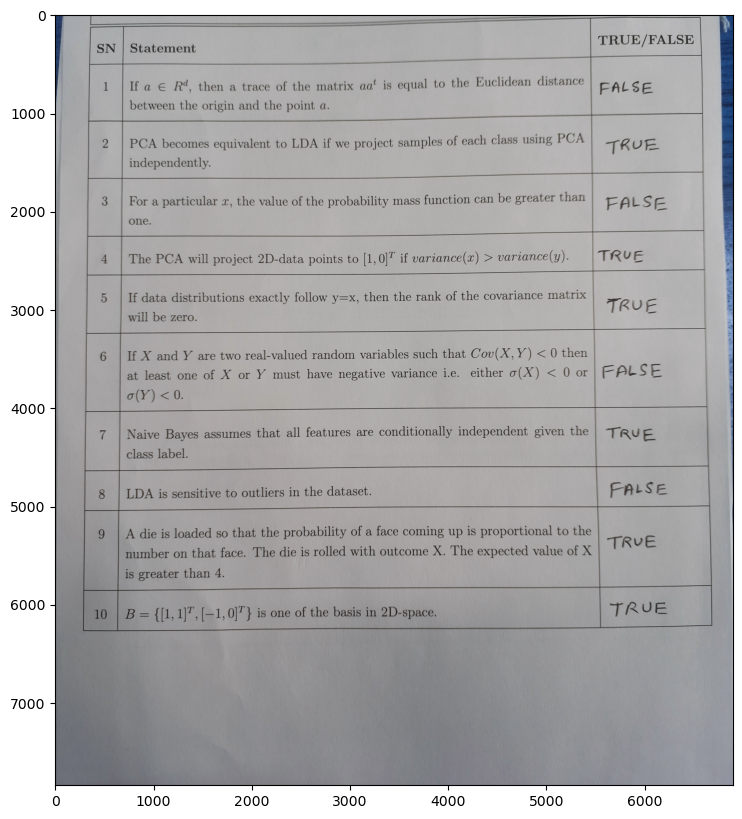

In [21]:
img2='Train_Samples_V0/Train_Samples_V0/20240328_145148.jpg'
sample_image = cv2.imread(img2)
plt.figure(figsize = (15,10))
plt.imshow(sample_image)

**Import EasyOCR libraries**

In [22]:
import shutil
import PIL.Image
import easyocr
from pylab import rcParams
from IPython.display import Image

In [23]:
# Set the EasyOCR -> Take help of GPUs to make it faster
reader = easyocr.Reader(['en'],gpu = True)

In [30]:
# Extarct the text from EasyOCR --> This will give several outputs like text and bounding boxes
image = cv2.imread(img2)
res = reader.readtext(img2)

**Save the extracted text**

In [31]:
all_text = []

for i in range(len(res)):
  text = res[i][1]
  all_text.append(text)

all_text_Str = ' '.join(map(str, all_text))
out_path = 'content/easyocr/out.txt'

with open(out_path, 'w', encoding='utf8') as file:
  file.write(all_text_Str)

**Plot the Bounding Boxes (BB) from EasyOCR**

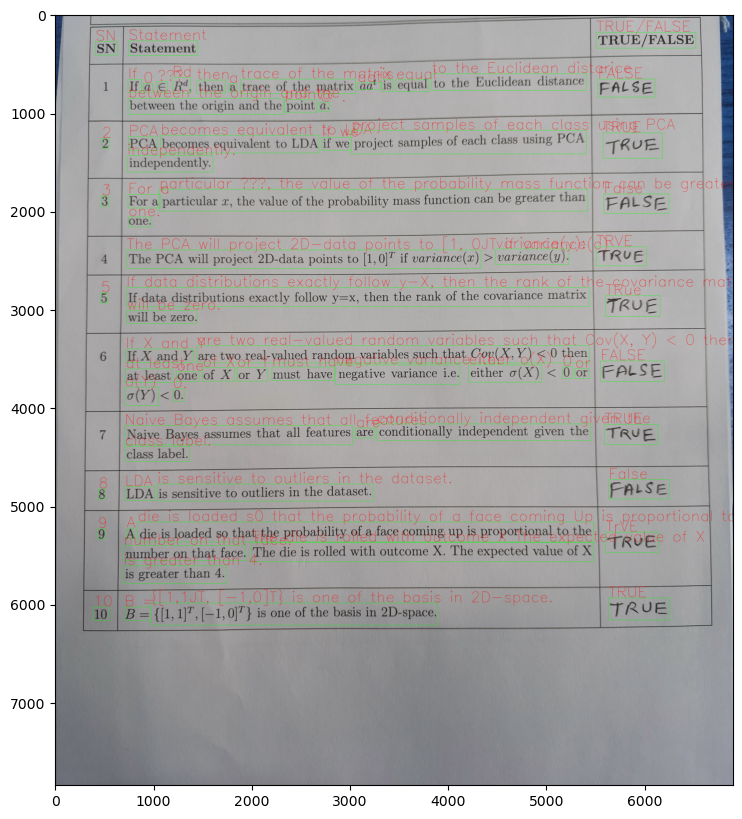

In [32]:
for (bbox, text, prob) in res:
  # unpack the bounding box
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
  cv2.rectangle(image, tl, br, (0, 255, 0), 2)
  cv2.putText(image, text, (tl[0], tl[1] - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 5.0, (255, 0, 0), 2)
plt.rcParams['figure.figsize'] = (10,10)
plt.imshow(image)